In [1]:
#Importing the libraries
import pandas as pd # linear algebra
import numpy as np # data processing
import seaborn as sns #Visualization
import matplotlib.pyplot as plt
import matplotlib.cm
from sklearn.preprocessing import Imputer
from pandas.tools.plotting import parallel_coordinates

Read data into pandas dataframe

In [2]:
rent_secondhand_data = pd.read_csv('/Users/hithyshikrishnamurthy/PycharmProjects/derelinx_internship/input/form_41g-price-sh-house-area-by_year_1.csv')
rent_house_data = pd.read_csv('/Users/hithyshikrishnamurthy/PycharmProjects/derelinx_internship/input/form_41e-price-new-house-area-by_year_1.csv')
rent_apartment_data = pd.read_csv('/Users/hithyshikrishnamurthy/PycharmProjects/derelinx_internship/input/form_41i-price-new-app-area-by_year_1.csv')


Numerical data summeries

In [8]:
rent_secondhand_data.head()

,YEAR,National Average,Dublin,Cork,Galway,Limerick,Waterford,Other Areas
0,1997,"102,623","132,176","88,454","101,020","77,905","73,548","86,175"
1,1998,"134,428","178,534","110,700","127,709","96,967","94,143","111,726"
2,1999,"163,142","212,383","140,015","148,177","118,943","115,884","135,266"
3,2000,"190,165","248,451","169,491","168,121","140,397","141,922","158,679"
4,2001,"206,490","271,421","180,467","192,652","158,600","157,830","171,958"


In [9]:
rent_house_data.head()

,YEAR,National Average,Dublin,Cork,Galway,Limerick,Waterford,Other Areas
0,1997,"102,037","123,231","96,504","111,108","91,236","92,372","94,642"
1,1998,"124,368","159,558","112,166","118,917","104,327","108,789","116,639"
2,1999,"147,043","191,942","140,797","137,510","122,146","132,510","137,031"
3,2000,"166,155","216,433","164,535","160,972","146,838","145,087","154,141"
4,2001,"181,146","252,192","175,372","171,578","154,515","157,767","167,493"


In [10]:
rent_apartment_data.head()

,YEAR,National Average,Dublin,Cork,Galway,Limerick,Waterford,Other Areas
0,1997,"104,299","115,605","89,070","98,561","87,962","82,269","95,075"
1,1998,"134,823","166,677","111,795","117,404","103,565","100,717","115,759"
2,1999,"168,033","201,714","144,711","152,428","118,980","125,421","135,331"
3,2000,"205,682","243,338","191,725","190,509","137,457","152,424","150,911"
4,2001,"196,386","224,485","159,741","168,145","129,876","127,174","153,404"


In [11]:
rent_secondhand_data.columns

Index(['YEAR', 'National Average', 'Dublin ', 'Cork', 'Galway', 'Limerick',
       'Waterford', 'Other Areas'],
      dtype='object')

Adding a new feature type to all CSV files and combining them into a single dataframe.Using oridnal values.

In [12]:
rent_secondhand_data['type'] = 0
rent_apartment_data['type']= 1
rent_house_data['type'] = 2
rent_secondhand_data.columns
rent_house_data.columns
rent_apartment_data.columns

Index(['YEAR', 'National Average', 'Dublin ', 'Cork', 'Galway', 'Limerick',
       'Waterford', 'Other Areas', 'type'],
      dtype='object')

In [13]:
combine = pd.concat([rent_secondhand_data,rent_house_data,rent_apartment_data], ignore_index=True)
combine.head()

,YEAR,National Average,Dublin,Cork,Galway,Limerick,Waterford,Other Areas,type
0,1997,"102,623","132,176","88,454","101,020","77,905","73,548","86,175",0
1,1998,"134,428","178,534","110,700","127,709","96,967","94,143","111,726",0
2,1999,"163,142","212,383","140,015","148,177","118,943","115,884","135,266",0
3,2000,"190,165","248,451","169,491","168,121","140,397","141,922","158,679",0
4,2001,"206,490","271,421","180,467","192,652","158,600","157,830","171,958",0


In [14]:
combine.describe()

,YEAR,type
count,57.000000,57.000000
mean,2006.000000,1.000000
std,5.525913,0.823754
min,1997.000000,0.000000
25%,2001.000000,0.000000
50%,2006.000000,1.000000
75%,2011.000000,2.000000
max,2015.000000,2.000000


The numerical data of prices of counties and national average is not being described. All the prices are of type string. Converting the price columns to integer datatype.

In [15]:
combine = combine.rename(columns={'Dublin ':'Dublin'})
combine = combine.rename(columns={'Other Areas':'Other'})
combine = combine.rename(columns={'National Average':'Average'})
combine.columns

Index(['YEAR', 'Average', 'Dublin', 'Cork', 'Galway', 'Limerick', 'Waterford',
       'Other', 'type'],
      dtype='object')

Fill the missing values with 0, to convert the datatype to int

In [16]:

combine['Galway'] = combine.Galway.str.replace('-', '0').astype(str)
combine['Limerick'] = combine.Limerick.str.replace('-', '0').astype(str)
combine['Waterford'] = combine.Waterford.str.replace('-', '0').astype(str)


In [17]:
#Successfully converted.
(combine[['Galway','Limerick','Waterford']]=='-').sum()

Galway       0
Limerick     0
Waterford    0
dtype: int64

In [18]:
#Remove the comma and convert the strings to integer type.
columns = ['Average','Dublin','Cork','Galway','Limerick','Waterford','Other']
combine['Average'] = combine.Average.str.replace(',', '').astype(int)
combine['Dublin'] = combine.Dublin.str.replace(',', '').astype(int)
combine['Cork'] = combine.Cork.str.replace(',', '').astype(int)
combine['Galway'] = combine.Galway.str.replace(',', '').astype(int)
combine['Limerick'] = combine.Limerick.str.replace(',', '').astype(int)
combine['Other'] = combine.Other.str.replace(',', '').astype(int)


In [22]:
combine['Waterford'] = combine.Waterford.str.replace(',', '').astype(int)
#Changed all datatypes successfully.
combine.dtypes

YEAR         int64
Average      int64
Dublin       int64
Cork         int64
Galway       int64
Limerick     int64
Waterford    int64
Other        int64
type         int64
dtype: object

In [573]:
combine.shape

(57, 9)

In [23]:
#Now combine.describe is giving the right summary.
combine.describe()

,YEAR,Average,Dublin,Cork,Galway,Limerick,Waterford,Other,type
count,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000
mean,2006.000000,233533.385965,301701.298246,217411.333333,205837.929825,179537.666667,175933.000000,192597.631579,1.000000
std,5.525913,68926.620143,102082.829704,71107.747619,74456.726812,65104.273415,72513.055042,60259.942422,0.823754
min,1997.000000,102037.000000,115605.000000,88454.000000,0.000000,0.000000,0.000000,86175.000000,0.000000
25%,2001.000000,190165.000000,224485.000000,169491.000000,160972.000000,129876.000000,132510.000000,149345.000000,0.000000
50%,2006.000000,233173.000000,302053.000000,227290.000000,210419.000000,193854.000000,174365.000000,198214.000000,1.000000
75%,2011.000000,278774.000000,364738.000000,255978.000000,248041.000000,224873.000000,223468.000000,234696.000000,2.000000
max,2015.000000,383996.000000,543959.000000,372720.000000,348822.000000,290670.000000,295397.000000,317635.000000,2.000000


In [24]:
#Here the value minimum=0 for Galway,Limerick,Waterford is incorrect and caused due to missing values
#Using an imputer to fix this.
(combine[['Galway','Limerick','Waterford']] == 0).sum()


Galway       2
Limerick     1
Waterford    3
dtype: int64

In [25]:
#Replacing all missing values with Nan.
combine[['Galway','Limerick','Waterford']] = combine[['Galway','Limerick','Waterford']].replace(0, np.NaN)
print(combine.isnull().sum())

YEAR         0
Average      0
Dublin       0
Cork         0
Galway       2
Limerick     1
Waterford    3
Other        0
type         0
dtype: int64


In [577]:
#Fill the missing values with mean. No more 0's in the dataset.
dummy = combine.fillna(combine.mean(), inplace=True)
(combine[['Galway','Limerick','Waterford']] == 0).sum()

Galway       0
Limerick     0
Waterford    0
dtype: int64

In [596]:
#Describe the dataset
combine.describe()

,YEAR,Average,Dublin,Cork,Galway,Limerick,Waterford,Other,type
count,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000
mean,2006.000000,233533.385965,301701.298246,217411.333333,213322.945455,182743.696429,185707.055556,192597.631579,1.000000
std,5.525913,68926.620143,102082.829704,71107.747619,63052.292134,60437.444414,59227.168336,60259.942422,0.823754
min,1997.000000,102037.000000,115605.000000,88454.000000,98561.000000,47500.000000,73548.000000,86175.000000,0.000000
25%,2001.000000,190165.000000,224485.000000,169491.000000,168145.000000,134500.000000,145000.000000,149345.000000,0.000000
50%,2006.000000,233173.000000,302053.000000,227290.000000,213322.945455,193854.000000,179716.000000,198214.000000,1.000000
75%,2011.000000,278774.000000,364738.000000,255978.000000,248041.000000,224873.000000,223468.000000,234696.000000,2.000000
max,2015.000000,383996.000000,543959.000000,372720.000000,348822.000000,290670.000000,295397.000000,317635.000000,2.000000


In [26]:
#The difference between mean and median is not very significant. 
print(combine.median())

YEAR           2006.0
Average      233173.0
Dublin       302053.0
Cork         227290.0
Galway       218308.0
Limerick     194598.0
Waterford    177998.0
Other        198214.0
type              1.0
dtype: float64


# Data Visualization

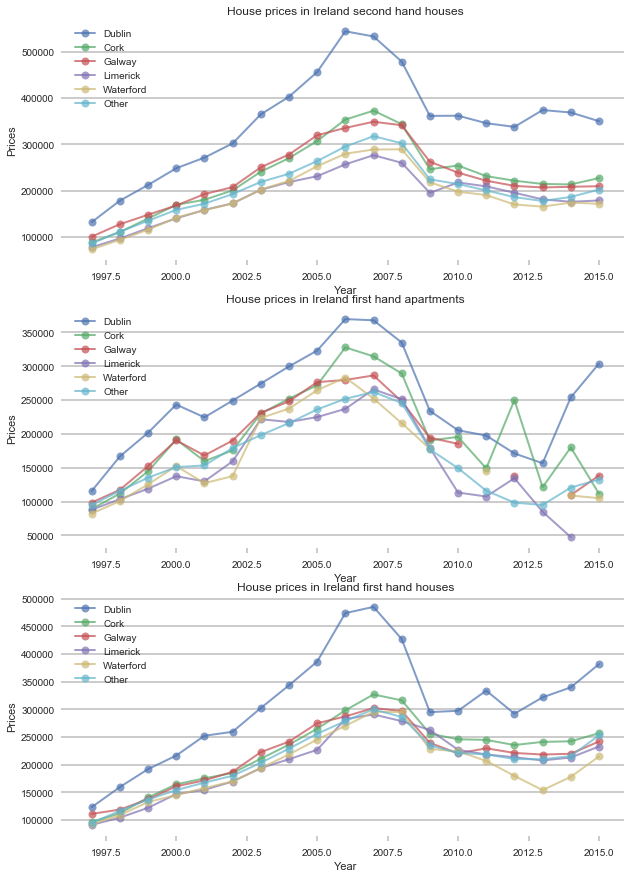

In [30]:
#Housing prices in different counties based on type of house and year
def plot_by_type(obj,type_name):
    counties = ['Dublin','Cork','Galway','Limerick','Waterford','Other']
    for county in counties:
        ax.plot(obj['YEAR'], obj[county], lw=2, marker='o', markersize=8,
                markeredgecolor='w', alpha=0.7, label=county)
    ax.tick_params(length=5, width=2, direction='out', color='#cccccc')
    ax.yaxis.grid(color='#cccccc', linestyle='-', lw=2)
    ax.xaxis.tick_bottom()
    ax.yaxis.tick_left()
    ax.legend(loc='upper left')
    plt.xlabel('Year')
    plt.ylabel('Prices')
    ax.set_title('House prices in Ireland '+type_name)

f = plt.figure()
f.set_figheight(15)
f.set_figwidth(10)

second_hand = combine[combine.type == 0]
apartments = combine[combine.type == 1]
houses = combine[combine.type == 2]
type_names = ['second hand houses','first hand apartments','first hand houses']
objects = [second_hand, apartments, houses]

for i in range(3):
    ax = plt.subplot(3,1,i+1,facecolor='w')
    plot_by_type(objects[i],type_names[i])
plt.show()


Clearly Dublin has highest price in all type of houses, followed by Cork and Galway.
Prices of Second hand houses have surpassed first hand houses many times. They were probably bigger and in
better places. Lets check this.
Apartments are the most affordable kind of houses.

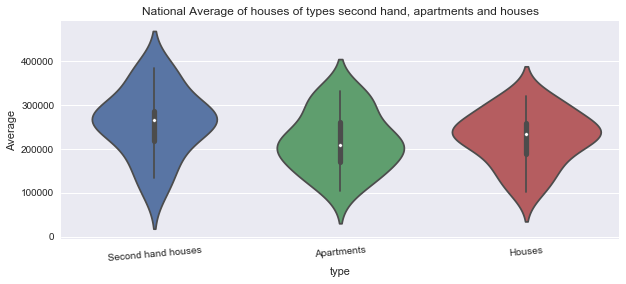

In [28]:
#National average price of different kind of houses over the years.
sns.set()
fig, ax = plt.subplots(figsize=(10,4))
plt.title('National Average of houses of types second hand, apartments and houses')
sns.violinplot(x="type", y="Average", data=combine, ax=ax)
plt.xticks([0,1,2],['Second hand houses','Apartments','Houses'], rotation=5)
plt.show()

Density of second hand houses is max. around 27k-30k , apartments around 20k and houses around 25k.

In [590]:
prices = combine.drop(['YEAR','type'],axis = 1)
prices.columns

Index(['Average', 'Dublin', 'Cork', 'Galway', 'Limerick', 'Waterford',
       'Other'],
      dtype='object')

In [382]:
prices.columns

Index(['Average', 'Dublin', 'Cork', 'Galway', 'Limerick', 'Waterford',
       'Other'],
      dtype='object')


Dublin is much expensive compared to the rest. Cork, Galway are on the same price range. Limerick and Waterford are
also in the same price range.


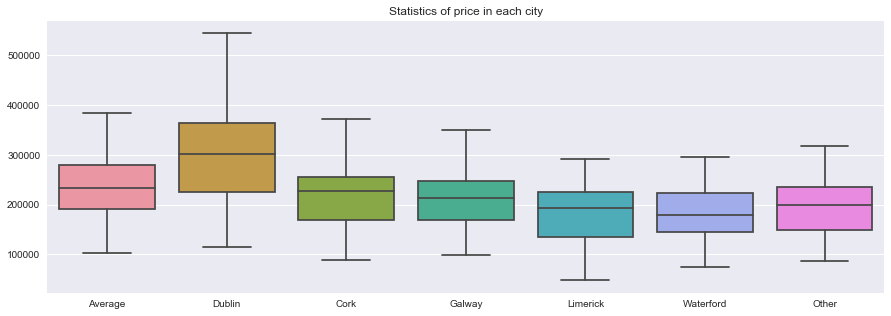

In [399]:
#Minimum, maximum and median prices of houses in each county.
plt.subplots(figsize = (15,5))
plt.title('Statistics of price in each city')
sns.boxplot(data = prices)
plt.show()


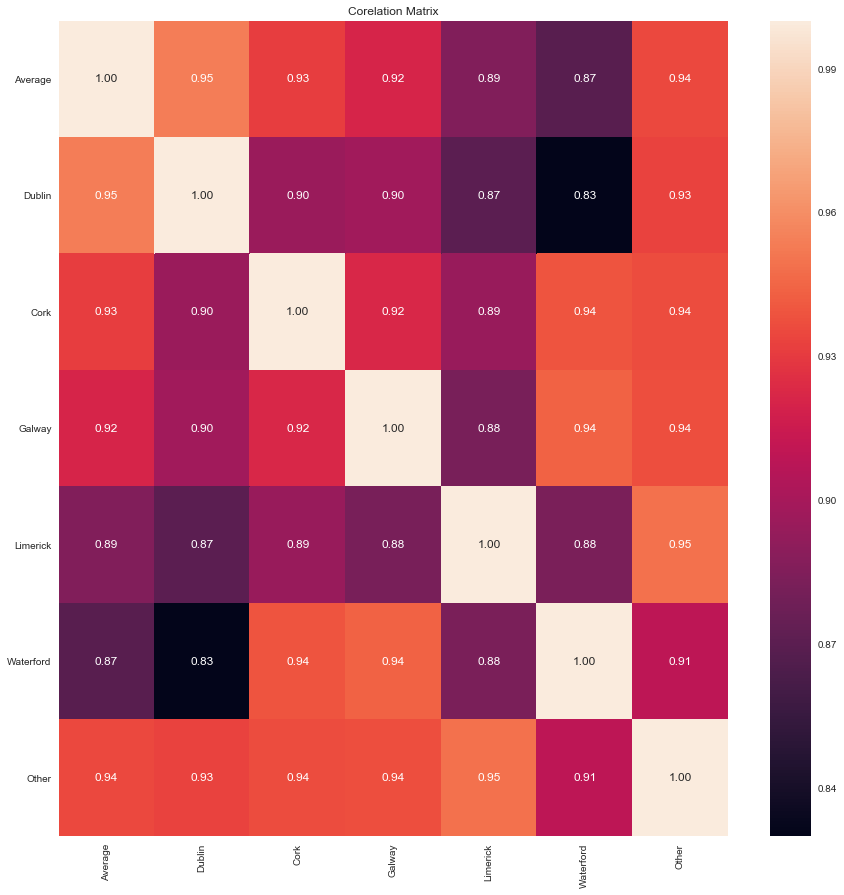

In [423]:
#The data is highly correlated indicating they are all essentially explaining the same information
plt.figure(figsize=(15,15))
sns.heatmap(prices.corr(),annot = True,fmt = ".2f",cbar = True)
plt.xticks(rotation=90)
plt.yticks(rotation = 0)
plt.title('Corelation Matrix')
plt.show()


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



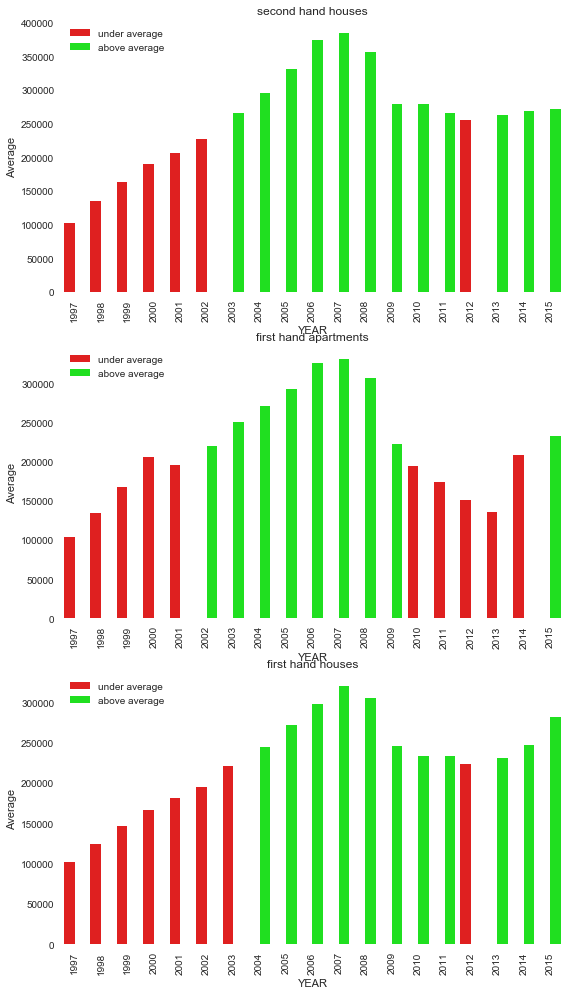

In [520]:
def bar_plot(obj, types):
    ave = sum(obj.Average)/float(len(obj))
    obj['ave_line'] = ave
    obj['avg'] = ['above average' if i > ave else 'under average' for i in obj.Average]
    sns.set_style('dark')
    
    sns.barplot(x='YEAR', y = 'Average', hue = 'avg',data= obj,palette={'above average':'lime', 'under average': 'red'})
    plt.title(types)
    plt.xticks(rotation=90)
    plt.legend(loc='upper left')

f = plt.figure()
f.set_figheight(17)
f.set_figwidth(9)

for i in range(3):
    ax = plt.subplot(3,1,i+1,facecolor='w')
    bar_plot(objects[i], type_names[i])
plt.show()


All property values dropped after 2007. Recession after effect. All property values are raising again since 2013.
Apartment prices are raising rapidly, but it's still cheaper than first and second hand houses.

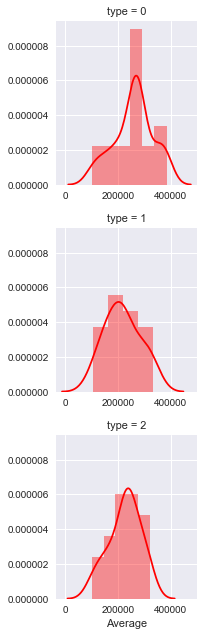

In [50]:
g = sns.FacetGrid(combine, row="type") 
g.map(sns.distplot, 'Average',color = 'r') 
plt.show()

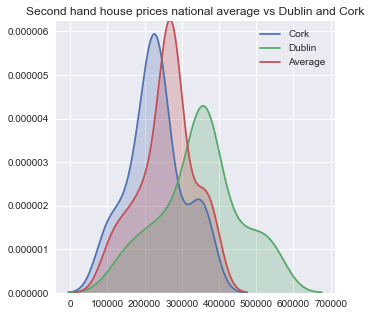

In [51]:
#Second hand house prices national average vs Dublin and Cork price comparision.
f = plt.figure()
f.set_figheight(5)
f.set_figwidth(5)
ax = sns.kdeplot(second_hand.Cork, shade=True)
ax1 = sns.kdeplot(second_hand.Dublin, shade=True)
ax2= sns.kdeplot(second_hand.Average, shade=True)
plt.title('Second hand house prices national average vs Dublin and Cork')
plt.show()

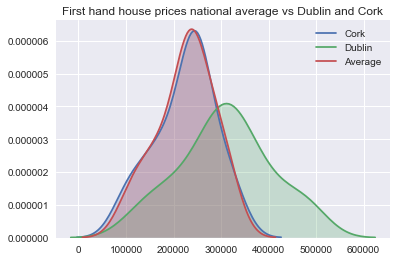

In [52]:
ax = sns.kdeplot(houses.Cork, shade=True)
ax1 = sns.kdeplot(houses.Dublin, shade=True)
ax2= sns.kdeplot(houses.Average, shade=True)
plt.title('First hand house prices national average vs Dublin and Cork')
plt.show()

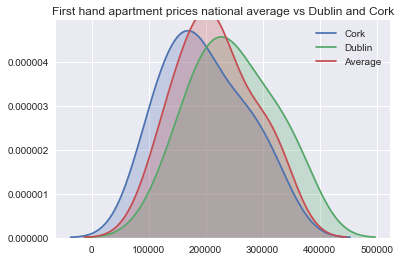

In [53]:
ax = sns.kdeplot(apartments.Cork, shade=True)
ax1 = sns.kdeplot(apartments.Dublin, shade=True)
ax2= sns.kdeplot(apartments.Average, shade=True)
plt.title('First hand apartment prices national average vs Dublin and Cork')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:4: FutureWarning:

'pandas.tools.plotting.parallel_coordinates' is deprecated, import 'pandas.plotting.parallel_coordinates' instead.



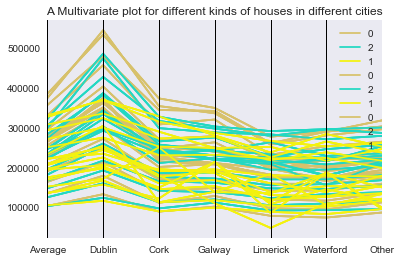

In [622]:
parallel_coordinates(combine.drop('YEAR',axis=1), 'type')
plt.title('A Multivariate plot for different kinds of houses in different cities')
plt.show()

Apartments are the best option in Dublin
In Cork there is no much difference between apartments and houses, probably location of the property matters.
In Limerick, second hand houses are much cheaper than apartments.
But, this picture depends on past data. The data has 3 trends.
1997-2007 = mostly upward, 2007 to 2012-13, mostly downward, 2013 onwards upward.

In [666]:
most_recent_data =  second_hand[second_hand.YEAR == 2015]
most_recent_data = most_recent_data.drop(['YEAR','type'],axis=1)
most_recent_data.columns

Index(['Average', 'Dublin', 'Cork', 'Galway', 'Limerick', 'Waterford',
       'Other'],
      dtype='object')

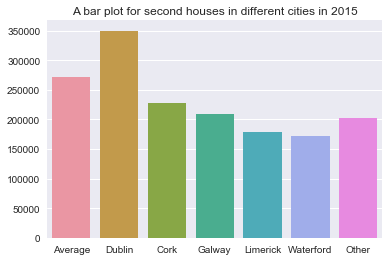

In [673]:
#A more clear analysis of recent trend.
plt.title('A bar plot for second houses in different cities in 2015')
sns.barplot(data=most_recent_data)
plt.show()

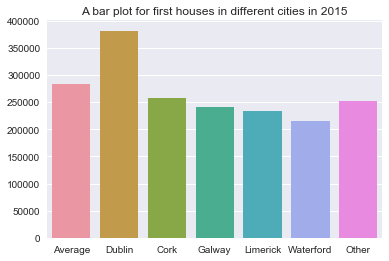

In [670]:
most_recent_data_house =  houses[houses.YEAR == 2015]
most_recent_data_house = most_recent_data_house.drop(['YEAR','type'],axis=1)
plt.title('A bar plot for first hand houses in different cities in 2015')
sns.barplot(data=most_recent_data_house)
plt.show()

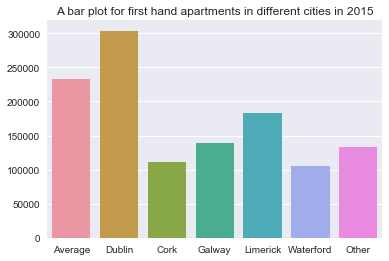

In [672]:
most_recent_data_apartments =  apartments[apartments.YEAR == 2015]
most_recent_data_apartments = most_recent_data_apartments.drop(['YEAR','type'],axis=1)
plt.title('A bar plot for first hand apartments in different cities in 2015')
sns.barplot(data=most_recent_data_apartments)
plt.show()